In [25]:
import numpy as np
from scipy.stats import shapiro, normaltest
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors
from ogb.lsc import PCQM4Mv2Dataset
import preprocessing.graph_preprocessing as gp
import pickle
import os

In [22]:
dataset = PCQM4Mv2Dataset(root = "/home/michpir/Documents/PROJECTS", only_smiles = True)

In [4]:
split_dict = dataset.get_idx_split()
train_idx = split_dict['train'] # numpy array storing indices of training molecules
valid_idx = split_dict['valid'] # numpy array storing indices of validation molecules
testdev_idx = split_dict['test-dev'] # numpy array storing indices of test-dev molecules
testchallenge_idx = split_dict['test-challenge'] # numpy array storing indices of test-challenge molecules

In [7]:
train_dataset = []
for index in train_idx:
    train_dataset.append(dataset[index])


In [ ]:
data_list_train = gp.create_graph_data(train_dataset, np.Inf, np.Inf, np.Inf, input_source="homo-lumo")

/home/michpir/Documents/PROJECTS/NeuralSpecLibrary/preprocessing/preprocessing_utils.py:41: UserWarning: Number of group is greater than one hot dimension representation
  warnings.warn("Number of group is greater than one hot dimension representation")
[23:56:40] WARNING: not removing hydrogen atom without neighbors
[23:56:40] WARNING: not removing hydrogen atom without neighbors
[23:56:40] WARNING: not removing hydrogen atom without neighbors


In [ ]:
PREPROCESSED_FILE = "/home/michpir/Documents/PROJECTS/dataset/train_homo_lumo_graph_pow.output"
with open(PREPROCESSED_FILE, 'wb') as fid:
  pickle.dump(data_list_train, fid)
  fid.close() 

In [ ]:

def process_and_save_chunk(chunk, file_name):
    # Convert the chunk of data to graph representations
    data_list = gp.create_graph_data(chunk, np.Inf, np.Inf, np.Inf, input_source="homo-lumo")
    
    # Append the processed chunk to the file
    with open(file_name, 'ab') as fid:
        pickle.dump(data_list, fid)

In [30]:
def iterate_over_dataset(dataset, path_file, chunk_size, index):
    # Process the dataset in chunks
    for start_idx in range(0, len(index), chunk_size):
        end_idx = min(start_idx + chunk_size, index[-1])
        train_chunk = [dataset[idx] for idx in train_idx[start_idx:end_idx]]
        process_and_save_chunk(train_chunk, path_file)
    
        print(f"Processed chunk {start_idx}-{end_idx}")

In [7]:


# Define the size of each chunk
chunk_size = 50000  # Adjust this based on your memory capacity

# File to save processed data
PREPROCESSED_FILE_TRAIN =  "/home/michpir/Documents/PROJECTS/dataset/train_homo_lumo_graph.output"
PREPROCESSED_FILE_VALIDATION =  "/home/michpir/Documents/PROJECTS/dataset/validation_homo_lumo_graph.output"
PREPROCESSED_FILE_TEST_DEV = "/home/michpir/Documents/PROJECTS/dataset/test_dev_homo_lumo_graph.output"
PREPROCESSED_FILE_TEST_CHALLENGE =  "/home/michpir/Documents/PROJECTS/dataset/test_challenge_homo_lumo_graph.output"

# Ensure the output file is empty initially
open(PREPROCESSED_FILE_TRAIN, 'wb').close()
open(PREPROCESSED_FILE_VALIDATION, 'wb').close()
open(PREPROCESSED_FILE_TEST_DEV, 'wb').close()
open(PREPROCESSED_FILE_TEST_CHALLENGE, 'wb').close()

iterate_over_dataset(dataset, PREPROCESSED_FILE_TRAIN, chunk_size, train_idx)
iterate_over_dataset(dataset, PREPROCESSED_FILE_VALIDATION, chunk_size, valid_idx)
iterate_over_dataset(dataset, PREPROCESSED_FILE_TEST_DEV, chunk_size, testdev_idx)
iterate_over_dataset(dataset, PREPROCESSED_FILE_TEST_CHALLENGE, chunk_size, testchallenge_idx)


Processed chunk 0-50000
Processed chunk 50000-100000
Processed chunk 100000-147432


In [11]:
print("hello")

hello


# Exploraton

In [15]:
# Function to compute molecular properties
def compute_properties(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return Descriptors.MolWt(mol), Descriptors.HeavyAtomCount(mol)
    else:
        return None, None

# Assuming you have a dataset in the form of a list of tuples
# dataset = [('SMILES_string', float_value), ...]

# Incrementally build the DataFrame
data = []
for smiles, value in dataset:  # Replace 'dataset' with your actual dataset variable
    mol_wt, atom_count = compute_properties(smiles)
    data.append({'SMILES': smiles, 'Value': value, 'MolWt': mol_wt, 'AtomCount': atom_count})

df = pd.DataFrame(data)

[16:58:35] WARNING: not removing hydrogen atom without neighbors
[16:58:35] WARNING: not removing hydrogen atom without neighbors
[16:58:35] WARNING: not removing hydrogen atom without neighbors
[16:58:43] WARNING: not removing hydrogen atom without neighbors
[16:58:43] WARNING: not removing hydrogen atom without neighbors
[16:58:52] WARNING: not removing hydrogen atom without neighbors
[16:58:52] WARNING: not removing hydrogen atom without neighbors
[16:58:52] WARNING: not removing hydrogen atom without neighbors
[16:58:54] Conflicting single bond directions around double bond at index 13.
[16:58:54]   BondStereo set to STEREONONE and single bond directions set to NONE.
[16:59:04] Conflicting single bond directions around double bond at index 11.
[16:59:04]   BondStereo set to STEREONONE and single bond directions set to NONE.


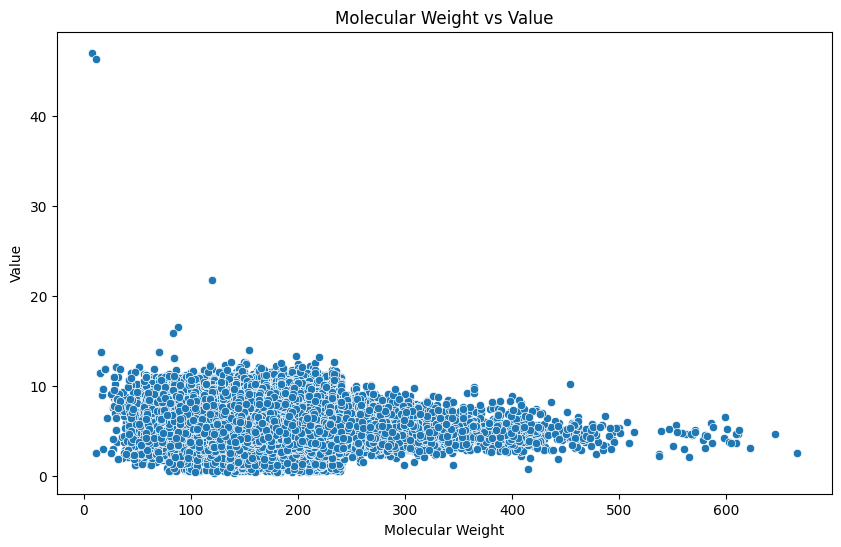

ValueError: could not convert string to float: 'O=C1[N]c2ccncc2[CH][C@@H]1c1ccc(cc1)C'

<Figure size 1000x800 with 0 Axes>

In [17]:
# Analyze molecular properties
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MolWt', y='Value', data=df)
plt.title('Molecular Weight vs Value')
plt.xlabel('Molecular Weight')
plt.ylabel('Value')
plt.show()


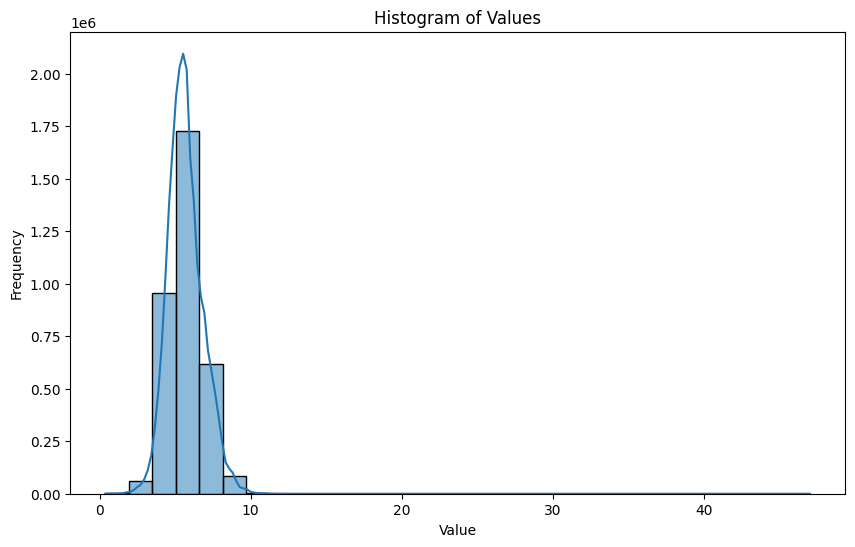

In [18]:
# Histogram of the 'Value' column
plt.figure(figsize=(10, 6))
sns.histplot(df['Value'], kde=True, bins=30)  # Adjust the number of bins as needed
plt.title('Histogram of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [19]:
df['Value'].describe()

count    3.452151e+06
mean     5.684253e+00
std      1.164615e+00
min      3.755171e-01
25%      4.903492e+00
50%      5.578334e+00
75%      6.367464e+00
max      4.702399e+01
Name: Value, dtype: float64

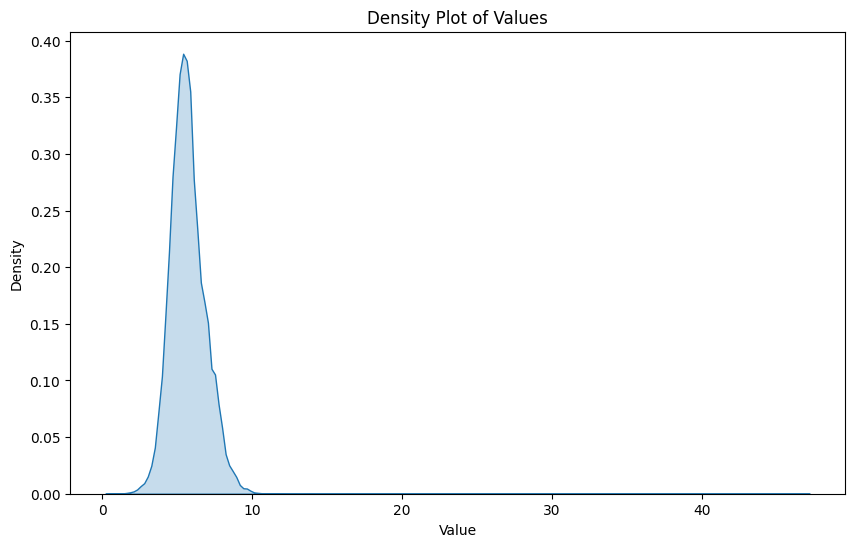

In [20]:
# Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Value'], fill=True)
plt.title('Density Plot of Values')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


In [23]:
# Normality Test (Shapiro-Wilk Test)
stat, p = shapiro(df['Value'])
alpha = 0.05
normality_result = 'Sample looks Gaussian (fail to reject H0)' if p > alpha else 'Sample does not look Gaussian (reject H0)'

/home/michpir/Documents/PROJECTS/NeuralSpecLibrary/venv/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [24]:
normality_result

'Sample looks Gaussian (fail to reject H0)'

In [27]:
stat, p = normaltest(df['Value'])
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)
